In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
# Read the dataset csv file and store it into a dataframe called "df"
df = pd.read_csv(r'F:\Data Indra\Project\Intro to ML\reservation cancelation\train__dataset.csv')
# use function head() to display first five rows dataset
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [4]:
df.shape

(18137, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [6]:
#check missing value
df.isnull().any()

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

In [7]:
#no missing values all data type correct
#categorycal columns already numeric
# cat columns:'type_of_meal_plan','required_carparking_space','room_type_reserved','arrival_year','arrival_month','arrival_date','repeated_guest'


In [8]:
#identify duplicate rows
duplicateRows = df[df.duplicated()]

#view duplicate rows
duplicateRows

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
182,1,0,0,3,0,0,0,113,2018,5,31,2,0,0,0,100.00,0,1
256,2,0,0,2,0,0,0,70,2018,6,3,0,0,0,0,100.00,0,0
325,2,0,0,2,0,0,0,68,2017,9,29,0,0,0,0,65.00,0,0
368,1,0,1,2,0,0,0,219,2017,9,4,0,0,0,0,76.67,0,0
431,1,0,2,1,0,0,0,1,2018,2,28,0,0,0,0,60.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18113,2,0,0,3,0,0,0,105,2018,10,12,1,0,0,0,75.00,0,1
18116,1,0,1,1,0,0,0,118,2018,6,6,0,0,0,0,110.00,0,0
18120,2,0,0,2,0,0,0,15,2017,12,1,1,1,1,0,69.00,0,0
18129,2,0,1,2,0,0,0,338,2018,10,7,0,0,0,0,80.00,0,1


In [9]:
#There are 4111 duplicate rows. we delete these duplicates, using the "keep" parameter
#because we assumed no different customer with the same details transaction data in reservation transaction.
#first we copy df to df1 and than delete the duplicates in the df1
df1 = df.copy()
df1.drop_duplicates(keep='first', inplace=True)
df1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [10]:
df1_duplicateRows = df1[df1.duplicated()]
df1_duplicateRows

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14026 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14026 non-null  int64  
 1   no_of_children                        14026 non-null  int64  
 2   no_of_weekend_nights                  14026 non-null  int64  
 3   no_of_week_nights                     14026 non-null  int64  
 4   type_of_meal_plan                     14026 non-null  int64  
 5   required_car_parking_space            14026 non-null  int64  
 6   room_type_reserved                    14026 non-null  int64  
 7   lead_time                             14026 non-null  int64  
 8   arrival_year                          14026 non-null  int64  
 9   arrival_month                         14026 non-null  int64  
 10  arrival_date                          14026 non-null  int64  
 11  market_segment_

<Axes: >

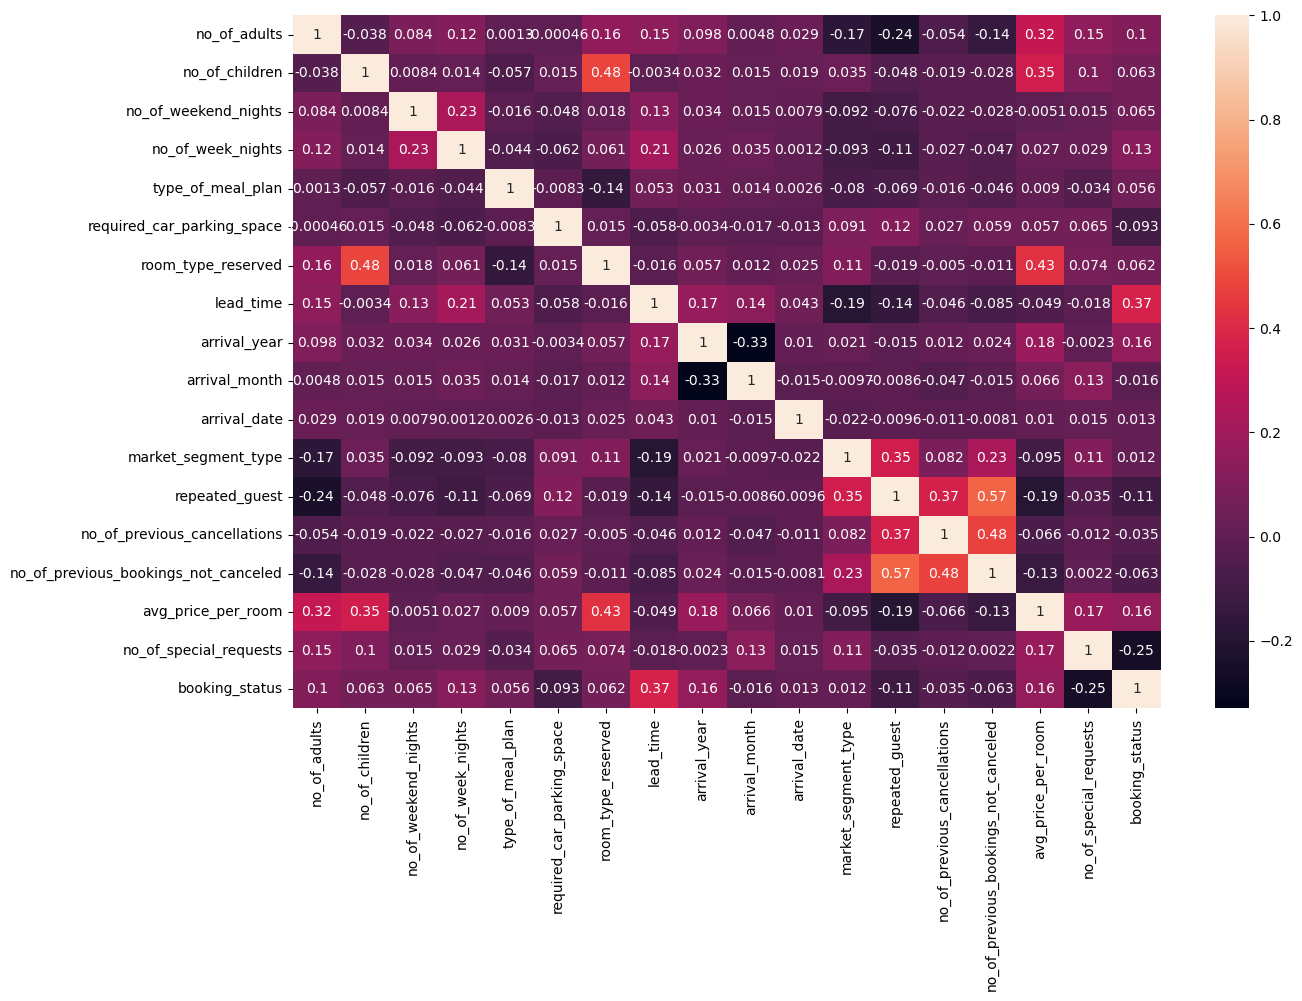

In [12]:
#check variables correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df1.corr(), annot =True)

In [13]:
#Check outlier for numerical variabel
num_col = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room','booking_status']
df_num = df1[num_col]

df_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14026 entries, 0 to 18136
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14026 non-null  int64  
 1   no_of_children                        14026 non-null  int64  
 2   no_of_weekend_nights                  14026 non-null  int64  
 3   no_of_week_nights                     14026 non-null  int64  
 4   lead_time                             14026 non-null  int64  
 5   no_of_previous_cancellations          14026 non-null  int64  
 6   no_of_previous_bookings_not_canceled  14026 non-null  int64  
 7   avg_price_per_room                    14026 non-null  float64
 8   booking_status                        14026 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.1 MB


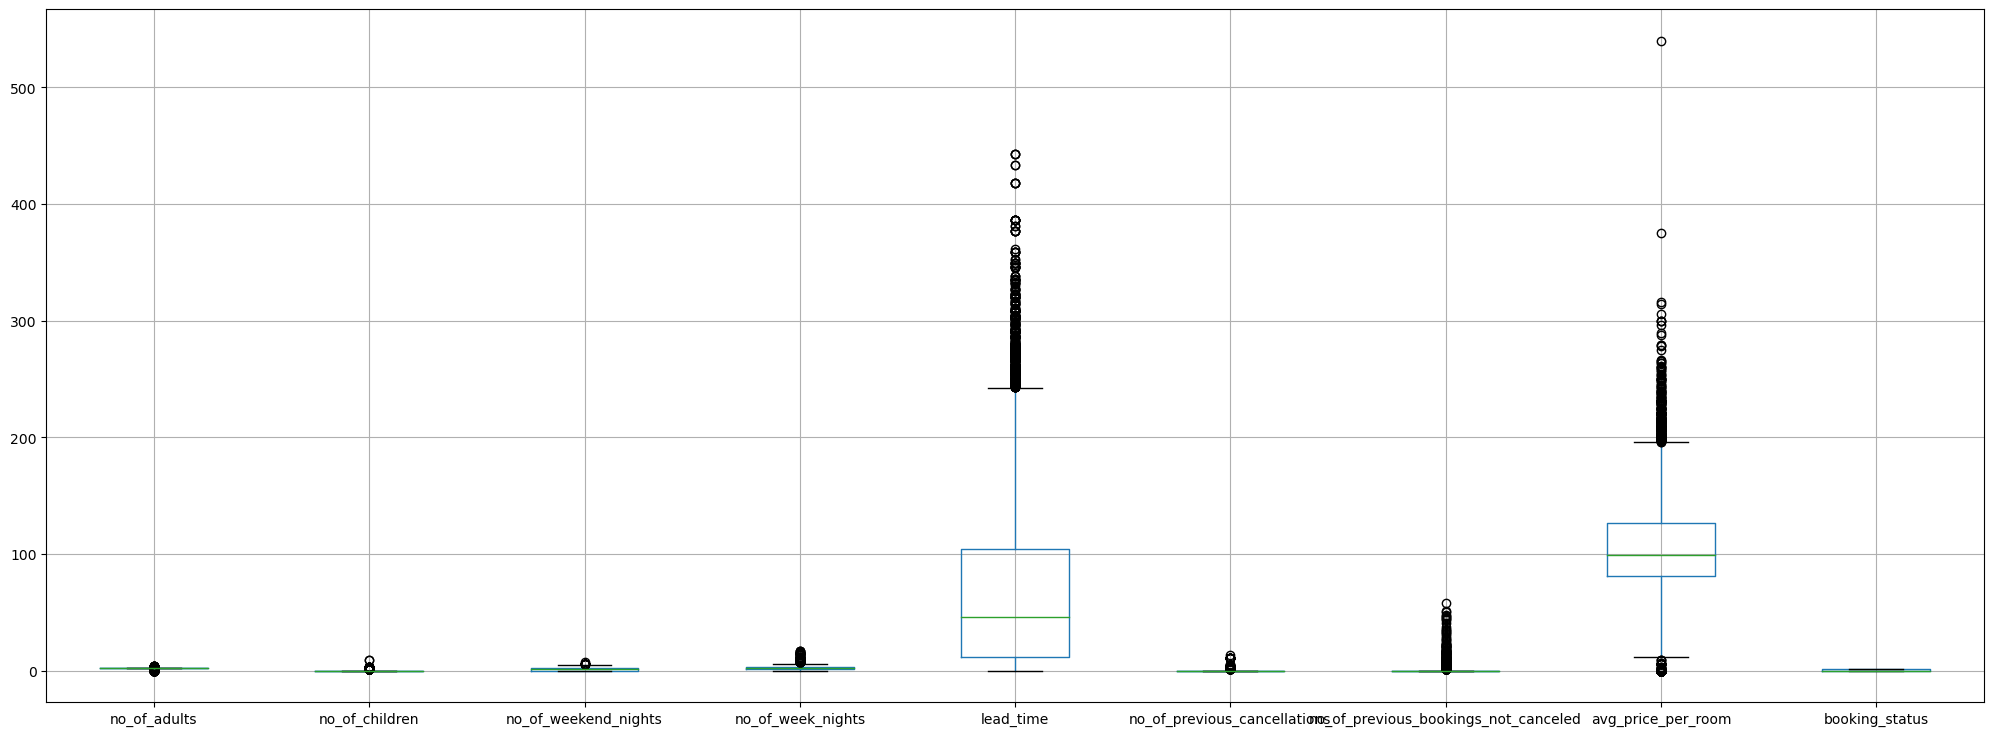

In [14]:
# Visualization numerical outliers with boxplot from matplotlib library
plt.figure(figsize=(25, 9))
df_num.boxplot()
plt.show()

In [15]:
#theres outliers in numerical colomns lead_time and avg_price_room:
# theres reservation of more then 250 day lead time, much higher than others.
#theres reservation of 2 adults has price room too far higher than others.


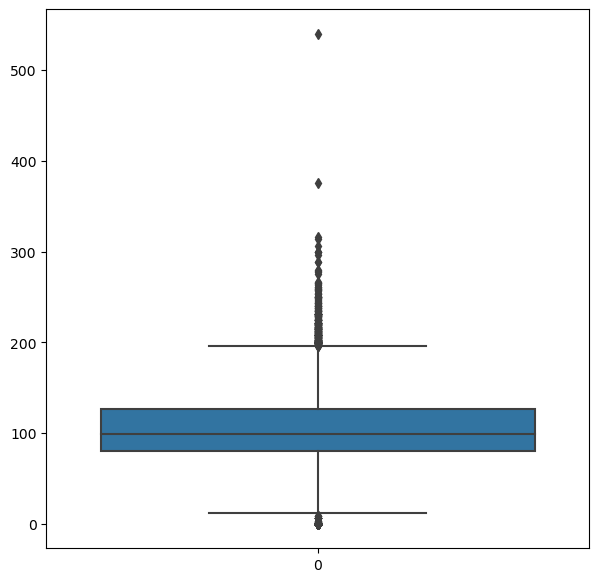

In [16]:
plt.figure(figsize=(7, 7))
sns.boxplot(df_num['avg_price_per_room'])
plt.show()

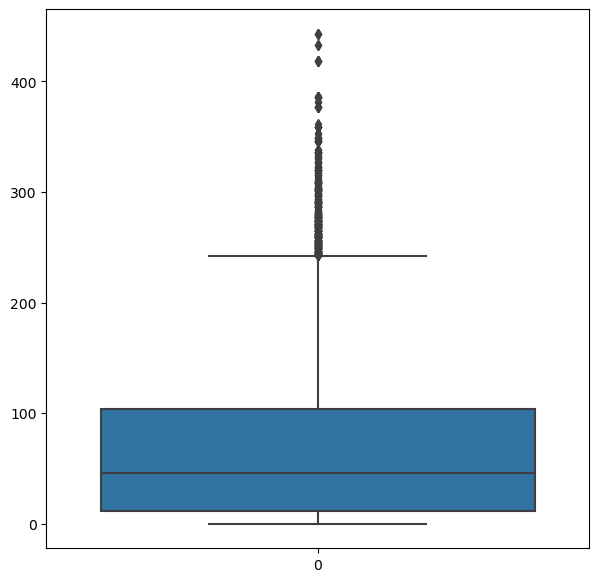

In [17]:
plt.figure(figsize=(7, 7))
sns.boxplot(df_num['lead_time'])
plt.show()

In [18]:
#sanity check
df_clean_outliers = df1.copy()
df_clean_outliers.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [19]:
# outliers removal with IQR method
# make upper_limit function since the outliers are in the upper IQR

def upper_limit(data, column):
    Q1 = np.percentile(data[column], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[column], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
       
    return Q3+1.5*IQR


In [20]:
# make outliers removal and boxplot vizualisation function

def removal_box_plot(data, column, upper_limit):
    sns.boxplot(data[column])
    plt.title(f'Original Boxplot of {column}')
    plt.show()
    
    removed_outliers = data[data[column] <= upper_limit]
      
    sns.boxplot(removed_outliers[column])
    plt.title(f'Boxplot without Outliers of {column}')
    plt.show
    return removed_outliers
   

C:\Users\drawy\AppData\Local\Temp\ipykernel_13428\1472717588.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ul_avgprice = upper_limit(df_clean_outliers, 'avg_price_per_room')


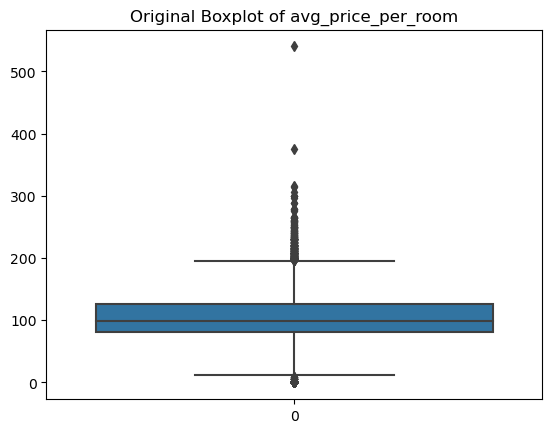

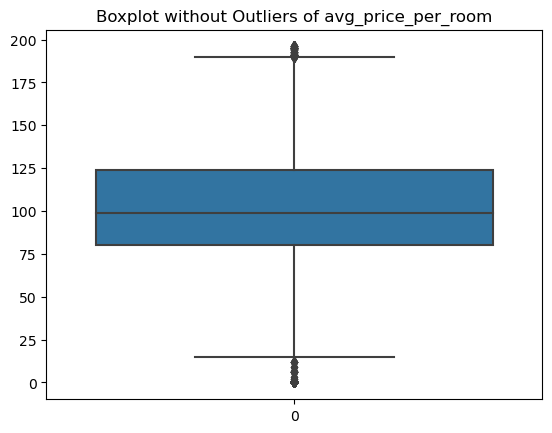

In [21]:
# removing outliers in avg_price_per_room column

ul_avgprice = upper_limit(df_clean_outliers, 'avg_price_per_room')

df_clean_outliers = removal_box_plot(df_clean_outliers, 'avg_price_per_room', ul_avgprice)


C:\Users\drawy\AppData\Local\Temp\ipykernel_13428\3151835533.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ul_leadtime = upper_limit(df_clean_outliers, 'lead_time')


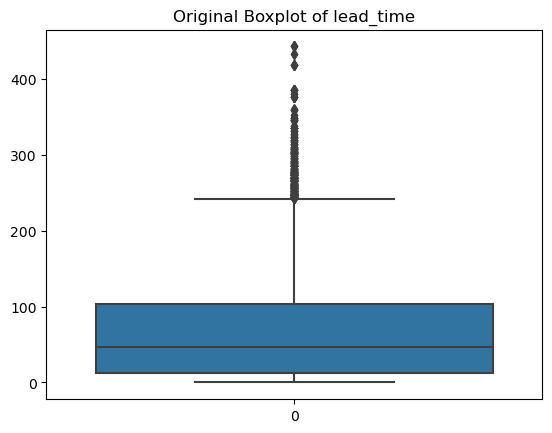

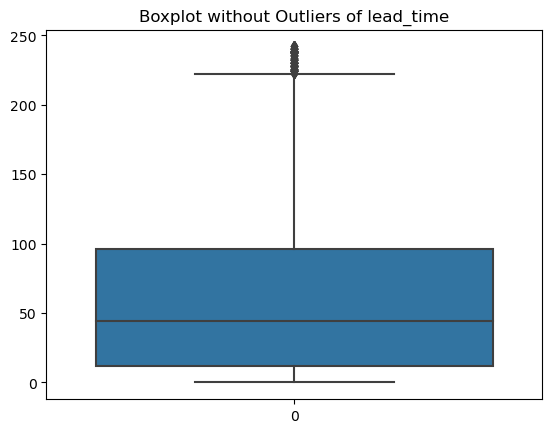

In [22]:
# removing outliers in lead_time column

ul_leadtime = upper_limit(df_clean_outliers, 'lead_time')

df_clean = removal_box_plot(df_clean_outliers, 'lead_time', ul_leadtime)

In [23]:
#sanity check
df_clean_outliers.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13731 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          13731 non-null  int64  
 1   no_of_children                        13731 non-null  int64  
 2   no_of_weekend_nights                  13731 non-null  int64  
 3   no_of_week_nights                     13731 non-null  int64  
 4   type_of_meal_plan                     13731 non-null  int64  
 5   required_car_parking_space            13731 non-null  int64  
 6   room_type_reserved                    13731 non-null  int64  
 7   lead_time                             13731 non-null  int64  
 8   arrival_year                          13731 non-null  int64  
 9   arrival_month                         13731 non-null  int64  
 10  arrival_date                          13731 non-null  int64  
 11  market_segment_

In [24]:
# analize categorical variabel
num_col_cleanout = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room','booking_status']
df_num_cleanout = df_clean_outliers[num_col_cleanout]

cat_col_cleanout = list(set(df_clean_outliers.columns) - set(num_col_cleanout))
df_cat_cleanout = df_clean_outliers[cat_col_cleanout]

df_cat_cleanout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13731 entries, 0 to 18136
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   type_of_meal_plan           13731 non-null  int64
 1   repeated_guest              13731 non-null  int64
 2   arrival_month               13731 non-null  int64
 3   arrival_date                13731 non-null  int64
 4   room_type_reserved          13731 non-null  int64
 5   required_car_parking_space  13731 non-null  int64
 6   arrival_year                13731 non-null  int64
 7   no_of_special_requests      13731 non-null  int64
 8   market_segment_type         13731 non-null  int64
dtypes: int64(9)
memory usage: 1.6 MB


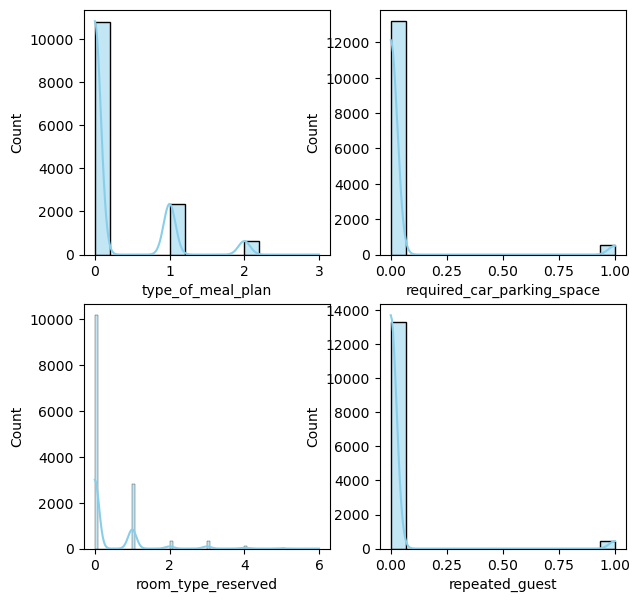

In [25]:
# sns.set(style='darkgrid')
fig, axs = plt.subplots(2, 2, figsize = (7, 7))

sns.histplot(data=df_cat_cleanout, x='type_of_meal_plan', kde=True, color='skyblue', ax=axs[0, 0])
sns.histplot(data=df_cat_cleanout, x='required_car_parking_space', kde=True, color='skyblue', ax=axs[0, 1])
sns.histplot(data=df_cat_cleanout, x='room_type_reserved', kde=True, color='skyblue', ax=axs[1, 0])
sns.histplot(data=df_cat_cleanout, x='repeated_guest', kde=True, color='skyblue', ax=axs[1, 1])

plt.show()

In [26]:
# from categoricals data distribution, generally dominate by zero value, its mean no type meal plan, no room type reserved, not required car parking place and not repeated guest

In [27]:
df_clean_outliers.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000
mean,1.878377,0.110844,0.876484,2.250310,0.261671,0.039400,0.365596,69.499454,2017.843202,7.362319,15.783701,0.929867,0.031098,0.026946,0.199330,102.834435,0.719613,0.288399
std,0.524622,0.404571,0.888566,1.514116,0.533838,0.194552,0.757036,71.675596,0.363624,3.152202,8.895966,0.601858,0.173588,0.408400,1.966942,33.717664,0.809742,0.453034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,2018.000000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,47.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.000000,1.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,104.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,124.100000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,196.000000,5.000000,1.000000


In [28]:
#Insight:

    # min-max value of the features generally not to far, except for avg room price and lead time. 
    # consider to standardize (re-scalling) if modelling in distance base algorithm.
    


In [29]:
#split Data input-output of the cleaned dataset
#make function splitInputOutput

def splitInputOutput(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [30]:
df_clean_splitIO = df_clean_outliers.copy()
target_column = 'booking_status'
X, y = splitInputOutput(data = df_clean_splitIO, target_column = target_column)

X.head, y.head

(<bound method NDFrame.head of        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
 0                 2               0                     1                  4   
 1                 2               1                     0                  2   
 2                 1               0                     1                  5   
 3                 1               0                     2                  4   
 4                 2               0                     0                  4   
 ...             ...             ...                   ...                ...   
 18131             2               0                     0                  5   
 18133             2               0                     0                  3   
 18134             2               0                     0                  1   
 18135             2               0                     0                  3   
 18136             1               0                     1                  1  

In [31]:
# splitting train-test data using Sklearn train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10984, 17), (2747, 17), (10984,), (2747,))

In [32]:
# Fitting Model (modelling)
#baseline Model
from sklearn.metrics import mean_absolute_error

y_pred_baseline = y_train.mean()
y_pred_baseline

0.2884195193008012

In [33]:
# determine mae baseline model
mae_train_baseline = mean_absolute_error(y_train, y_pred_baseline * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_pred_baseline * np.ones(len(y_test)))

print(f"MAE Train :{mae_train_baseline:.4f}")
print(f"MAE CV    :{mae_train_baseline:.4f}")
print(f"MAE Test  :{mae_test_baseline:.4f}")

MAE Train :0.4105
MAE CV    :0.4105
MAE Test  :0.4104


In [34]:
# number of positive class in imbalanced dataset
y_train.value_counts(normalize = True)


0    0.71158
1    0.28842
Name: booking_status, dtype: float64

In [35]:
#fitting Model in imbalanced dataset with LogisticRegression algorithm

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7939570440480525
Confusion Matrix : 
[[1807  148]
 [ 418  374]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1955
           1       0.72      0.47      0.57       792

    accuracy                           0.79      2747
   macro avg       0.76      0.70      0.72      2747
weighted avg       0.78      0.79      0.78      2747



C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#Modelling imbalanced dataset with RandomForestClassifier algorithm

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8503822351656353
Confusion Matrix : 
[[1798  157]
 [ 254  538]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1955
           1       0.77      0.68      0.72       792

    accuracy                           0.85      2747
   macro avg       0.83      0.80      0.81      2747
weighted avg       0.85      0.85      0.85      2747



In [37]:
#Modelling imbalanced dataset with DecisionTreeClassifier algorithm

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.7928649435748089
Confusion Matrix : 
[[1666  289]
 [ 280  512]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1955
           1       0.64      0.65      0.64       792

    accuracy                           0.79      2747
   macro avg       0.75      0.75      0.75      2747
weighted avg       0.79      0.79      0.79      2747



In [38]:
#Modelling imbalanced dataset with AdaBoostClassifier algorithm

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score of Ada Boost Classifier is : 0.8245358572988715
Confusion Matrix : 
[[1733  222]
 [ 260  532]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1955
           1       0.71      0.67      0.69       792

    accuracy                           0.82      2747
   macro avg       0.79      0.78      0.78      2747
weighted avg       0.82      0.82      0.82      2747



In [39]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Gradient Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Gradient Boost Classifier is : 0.8434655988350929
Confusion Matrix : 
[[1795  160]
 [ 270  522]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1955
           1       0.77      0.66      0.71       792

    accuracy                           0.84      2747
   macro avg       0.82      0.79      0.80      2747
weighted avg       0.84      0.84      0.84      2747



In [40]:
# Model Accuracy Comparison without handling Imbalanced data train
models_1 = pd.DataFrame({
    'Model_1' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier'],
    'Score_1' : [acc_lr, acc_dtc, acc_rd_clf, acc_ada, acc_gb]
})


models_1.sort_values(by = 'Score_1', ascending = False)

,Model_1,Score_1
2,Random Forest Classifier,0.850382
4,Gradient Boosting Classifier,0.843466
3,Ada Boost Classifier,0.824536
0,Logistic Regression,0.793957
1,Decision Tree Classifier,0.792865


In [41]:
# handling imbalanced data with random under samping

rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only from majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_rus, y_rus = rus.fit_resample(X_train, y_train)

X_rus.shape, y_rus.shape

((6336, 17), (6336,))

In [42]:
# number of positive class in rus_resampled dataset
y_rus.value_counts()


0    3168
1    3168
Name: booking_status, dtype: int64

In [43]:
# model fitting rus_resampled dataset using RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(X_rus, y_rus)

y_pred_rdf_rus = rdf.predict(X_test)

acc_rdf_rus = accuracy_score(y_test, y_pred_rdf_rus)
conf_rdf_rus = confusion_matrix(y_test, y_pred_rdf_rus)
clf_report_rdf_rus = classification_report(y_test, y_pred_rdf_rus)

print(f"Accuracy Score of Random Forest is : {acc_rdf_rus}")
print(f"Confusion Matrix : \n{conf_rdf_rus}")
print(f"Classification Report : \n{clf_report_rdf_rus}")

Accuracy Score of Random Forest is : 0.8085183836912996
Confusion Matrix : 
[[1561  394]
 [ 132  660]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1955
           1       0.63      0.83      0.72       792

    accuracy                           0.81      2747
   macro avg       0.77      0.82      0.79      2747
weighted avg       0.84      0.81      0.82      2747



In [44]:
# model fitting rus_resampled dataset using AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_rus, y_rus) #AdaBoostClassifier

y_pred_ada_rus = ada.predict(X_test)

acc_ada_rus = accuracy_score(y_test, y_pred_ada_rus)
conf_ada_rus = confusion_matrix(y_test, y_pred_ada_rus)
clf_report_ada_rus = classification_report(y_test, y_pred_ada_rus)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada_rus}")
print(f"Confusion Matrix : \n{conf_ada_rus}")
print(f"Classification Report : \n{clf_report_ada_rus}")

C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score of Ada Boost Classifier is : 0.7459046232253367
Confusion Matrix : 
[[1413  542]
 [ 156  636]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1955
           1       0.54      0.80      0.65       792

    accuracy                           0.75      2747
   macro avg       0.72      0.76      0.72      2747
weighted avg       0.80      0.75      0.76      2747



In [45]:
# model fitting rus_resampled dataset using GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_rus, y_rus)

y_pred_gb_rus = gb.predict(X_test)

acc_gb_rus = accuracy_score(y_test, y_pred_gb_rus)
conf_gb_rus = confusion_matrix(y_test, y_pred_gb_rus)
clf_report_gb_rus = classification_report(y_test, y_pred_gb_rus)

print(f"Accuracy Score of Gradient Boost Classifier is : {acc_gb_rus}")
print(f"Confusion Matrix : \n{conf_gb_rus}")
print(f"Classification Report : \n{clf_report_gb_rus}")

Accuracy Score of Gradient Boost Classifier is : 0.8198034219148161
Confusion Matrix : 
[[1623  332]
 [ 163  629]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1955
           1       0.65      0.79      0.72       792

    accuracy                           0.82      2747
   macro avg       0.78      0.81      0.79      2747
weighted avg       0.84      0.82      0.82      2747



In [46]:
# Model Accuracy Comparison with handling Imbalanced dataset by RandomUnderSampling
models = pd.DataFrame({
    'Model' : ['Random Forest Classifier','Ada Boost Classifier', 'Gradient Boosting Classifier'],
    'Score' : [acc_rdf_rus, acc_ada_rus, acc_gb_rus]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Gradient Boosting Classifier,0.819803
0,Random Forest Classifier,0.808518
1,Ada Boost Classifier,0.745905


In [47]:
#handling imbalanced dataset with RandomOverSampling
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X_ros, y_ros = ros.fit_resample(X_train, y_train)


In [48]:
# number of minority class observations

y_train.value_counts(), y_ros.value_counts()

(0    7816
 1    3168
 Name: booking_status, dtype: int64,
 1    7816
 0    7816
 Name: booking_status, dtype: int64)

In [49]:
# modelling balanced dataset_ROS using random forest classifier 
rdf_clf = RandomForestClassifier()
rdf_clf.fit(X_ros, y_ros)

y_pred_rdf_ros = rdf_clf.predict(X_test)

acc_rdf_ros = accuracy_score(y_test, y_pred_rdf_ros)
conf_rdf_ros = confusion_matrix(y_test, y_pred_rdf_ros)
clf_report_rdf_ros = classification_report(y_test, y_pred_rdf_ros)

print(f"Accuracy Score of Random Forest is : {acc_rdf_ros}")
print(f"Confusion Matrix : \n{conf_rdf_ros}")
print(f"Classification Report : \n{clf_report_rdf_ros}")

Accuracy Score of Random Forest is : 0.8467419002548234
Confusion Matrix : 
[[1744  211]
 [ 210  582]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1955
           1       0.73      0.73      0.73       792

    accuracy                           0.85      2747
   macro avg       0.81      0.81      0.81      2747
weighted avg       0.85      0.85      0.85      2747



In [50]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_rus, y_rus)

y_pred_ada_ros = ada.predict(X_test)

acc_ada_ros = accuracy_score(y_test, y_pred_ada_ros)
conf_ada_ros = confusion_matrix(y_test, y_pred_ada_ros)
clf_report_ada_ros = classification_report(y_test, y_pred_ada_ros)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada_ros}")
print(f"Confusion Matrix : \n{conf_ada_ros}")
print(f"Classification Report : \n{clf_report_ada_ros}")

C:\Users\drawy\anaconda3\envs\statistic_env\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score of Ada Boost Classifier is : 0.746268656716418
Confusion Matrix : 
[[1412  543]
 [ 154  638]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1955
           1       0.54      0.81      0.65       792

    accuracy                           0.75      2747
   macro avg       0.72      0.76      0.72      2747
weighted avg       0.80      0.75      0.76      2747



In [51]:
gb = GradientBoostingClassifier()
gb.fit(X_ros, y_ros)

y_pred_gb_ros = gb.predict(X_test)

acc_gb_ros = accuracy_score(y_test, y_pred_gb_ros)
conf_gb_ros = confusion_matrix(y_test, y_pred_gb_ros)
clf_report_gb_ros = classification_report(y_test, y_pred_gb_ros)

print(f"Accuracy Score of Gradient Boost Classifier is : {acc_gb_ros}")
print(f"Confusion Matrix : \n{conf_gb_ros}")
print(f"Classification Report : \n{clf_report_gb_ros}")

Accuracy Score of Gradient Boost Classifier is : 0.8238077903167091
Confusion Matrix : 
[[1641  314]
 [ 170  622]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1955
           1       0.66      0.79      0.72       792

    accuracy                           0.82      2747
   macro avg       0.79      0.81      0.80      2747
weighted avg       0.84      0.82      0.83      2747



In [52]:
# Model Accuracy Comparison with handling Imbalanced dataset by RandomOverSampling
models = pd.DataFrame({
    'Model' : ['Random Forest Classifier','Ada Boost Classifier', 'Gradient Boosting Classifier'],
    'Score' : [acc_rdf_ros, acc_ada_ros, acc_gb_ros]
})

print('Models Accuracy Comparison resampled dataset with RandomOverSampling')
models.sort_values(by = 'Score', ascending = False)

Models Accuracy Comparison resampled dataset with RandomOverSampling


,Model,Score
0,Random Forest Classifier,0.846742
2,Gradient Boosting Classifier,0.823808
1,Ada Boost Classifier,0.746269


In [53]:
# in the mild imbalanced data  
# in this case resampling dataset using Random Over sampling show better in over all models performanace metrics score, then using random under sampling method. .
# random forest classifier reach the highest score both from imbalanced dataset and resampled dataset using Random Over sampling 

In [54]:
# Predict MAE
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)



mae_test = mean_absolute_error(y_test,y_pred_rd_clf)

print(f"MAE Test RF       :{mae_test:.4f}")
print(f"MAE Test Baseline :{mae_test_baseline:.4f}")
print(f"MAE Test %        :{(mae_test/mae_test_baseline):.4f}")

MAE Test RF       :0.1500
MAE Test Baseline :0.4104
MAE Test %        :0.3654


In [55]:
summary_test_pred_rf = pd.DataFrame({"actual": y_test,
                                   "prediction": y_pred_rd_clf})

summary_test_pred_rf.head()

,actual,prediction
3600,0,0
4802,1,1
5334,0,0
11393,0,0
998,0,0


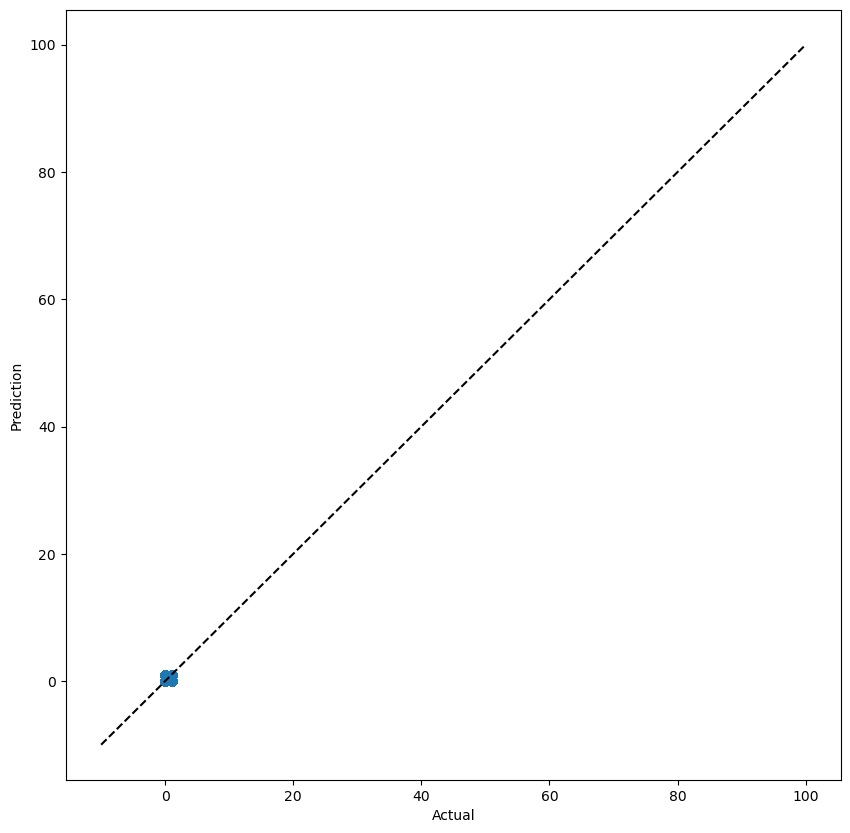

In [56]:
# Plot Result
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.scatter(y_test, y_pred_rd_clf)
ax.plot([-10,100 ], [-10, 100], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
plt.show()

In [57]:
# check variables correlation after cleaning outliers
# Move the predict variable "booking_status" to the front of the table
front = df_clean_outliers['booking_status']
df_clean_outliers.drop(labels=['booking_status'], axis=1,inplace = True)
df_clean_outliers.insert(0, 'booking_status', front)
df_clean_outliers.head()

,booking_status,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2
1,1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0
2,1,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0
3,1,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0
4,0,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1


In [58]:
# display Pearson correlation coefficient value of the features with the target variable
corr_df_clean_outliers = df_clean_outliers.corr()['booking_status'].abs().sort_values(ascending = False)
corr_df_clean_outliers

booking_status                          1.000000
lead_time                               0.376787
no_of_special_requests                  0.245133
arrival_year                            0.163994
avg_price_per_room                      0.154951
no_of_week_nights                       0.124206
repeated_guest                          0.109421
no_of_adults                            0.103770
required_car_parking_space              0.092571
no_of_previous_bookings_not_canceled    0.063455
no_of_weekend_nights                    0.062986
type_of_meal_plan                       0.053239
room_type_reserved                      0.046559
no_of_children                          0.043337
no_of_previous_cancellations            0.034526
arrival_month                           0.016666
arrival_date                            0.013040
market_segment_type                     0.012482
Name: booking_status, dtype: float64

<Axes: >

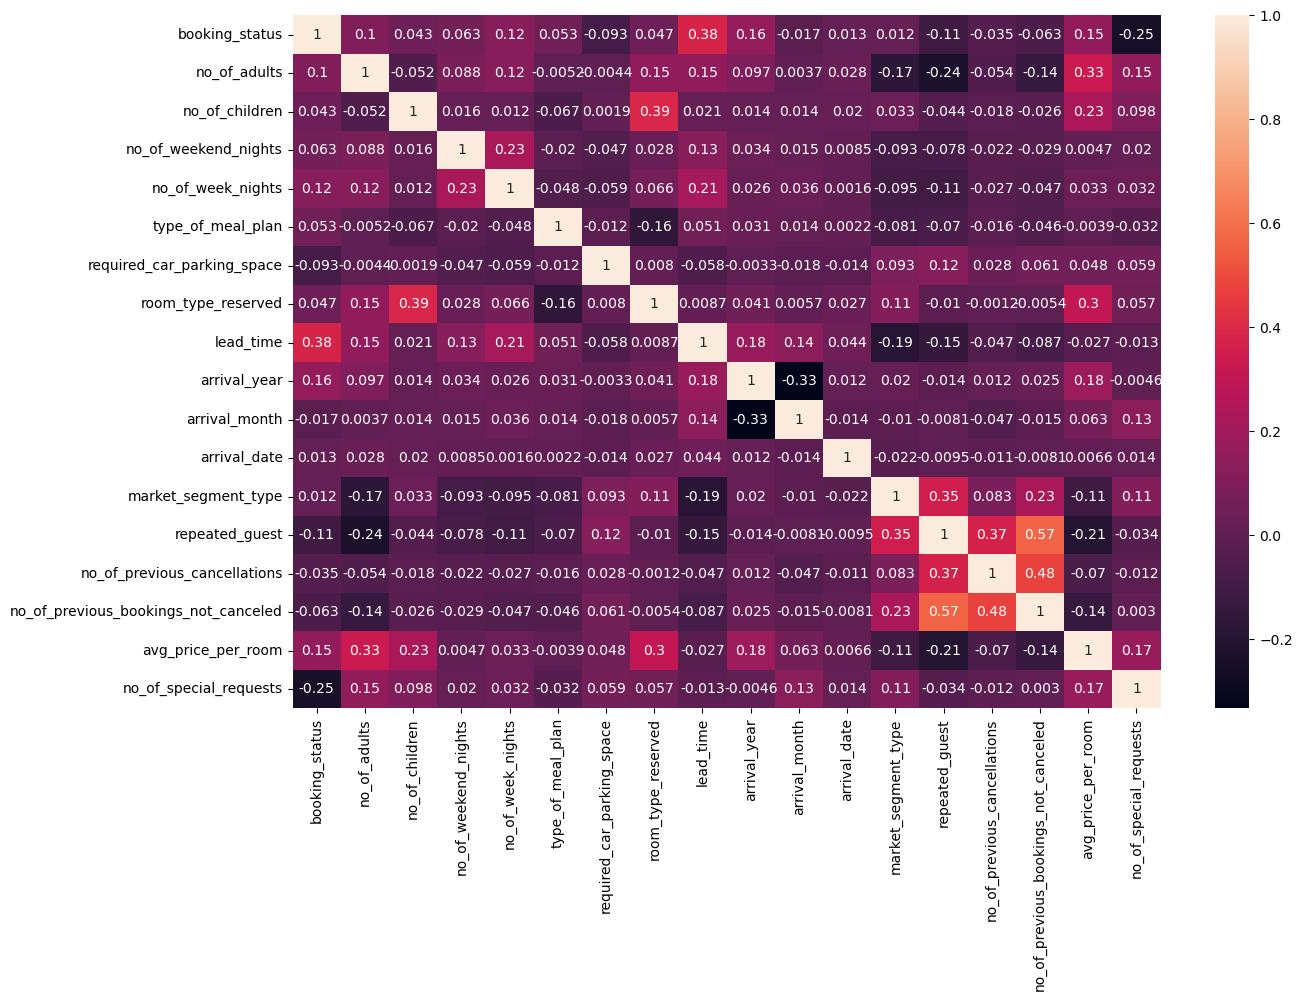

In [59]:
# optimization using correlation-based feature selection (CFS)
# check features correlation matrix 

plt.figure(figsize=(14,9))
sns.heatmap(df_clean_outliers.corr(), annot =True)

In [60]:
#  from the data display and the matrix Pearson correlation coefficient features above
# lead_time has the high correlation with the target variable (0.38) follow by no_of_special_requests (0.25),
# arrival_year (0.16), avg_price_per_room (0.15), no_of_week_nights (0.12), repeated_guest (0.11) and no_of_adults (0.10)
# while others has insignificant correlation coefficient which can be ignore/ drop from dataset.

cfs_col = ['booking_status', 'lead_time', 'no_of_special_requests', 'arrival_year', 'avg_price_per_room', 'no_of_week_nights', 
           'repeated_guest', 'no_of_adults']
df_cfs = df_clean_outliers[cfs_col]
df_cfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13731 entries, 0 to 18136
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   booking_status          13731 non-null  int64  
 1   lead_time               13731 non-null  int64  
 2   no_of_special_requests  13731 non-null  int64  
 3   arrival_year            13731 non-null  int64  
 4   avg_price_per_room      13731 non-null  float64
 5   no_of_week_nights       13731 non-null  int64  
 6   repeated_guest          13731 non-null  int64  
 7   no_of_adults            13731 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 1.4 MB


In [61]:
# splitting data input-output of cfs result dataset
target_column = 'booking_status'
X_cfs, y_cfs = splitInputOutput(data = df_cfs, target_column = target_column)

X_cfs.head, y_cfs.head

(<bound method NDFrame.head of        lead_time  no_of_special_requests  arrival_year  avg_price_per_room  \
 0            118                       2          2017              110.80   
 1             17                       0          2018              145.00   
 2            349                       0          2018               96.67   
 3             69                       0          2018              120.00   
 4             11                       1          2018               69.50   
 ...          ...                     ...           ...                 ...   
 18131        205                       1          2018               70.03   
 18133        129                       1          2018               88.01   
 18134         90                       0          2018              105.30   
 18135         18                       1          2018              123.33   
 18136        159                       0          2018               65.00   
 
        no_of_week_n

In [62]:
# splitting train-test data using Sklearn train_test_split function

X_cfs, X_test, y_cfs, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 123)

X_cfs.shape, X_test.shape, y_cfs.shape, y_test.shape

((10984, 17), (2747, 17), (10984,), (2747,))

In [63]:
# model fitting dataset_cfs using RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(X_cfs, y_cfs)

y_pred_rdf_cfs = rdf.predict(X_test)

acc_rdf_cfs = accuracy_score(y_test, y_pred_rdf_cfs)
conf_rdf_cfs = confusion_matrix(y_test, y_pred_rdf_cfs)
clf_report_rdf_cfs = classification_report(y_test, y_pred_rdf_cfs)

print(f"Accuracy Score of Random Forest is : {acc_rdf_cfs}")
print(f"Confusion Matrix : \n{conf_rdf_cfs}")
print(f"Classification Report : \n{clf_report_rdf_cfs}")

Accuracy Score of Random Forest is : 0.847834000728067
Confusion Matrix : 
[[1789  166]
 [ 252  540]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1955
           1       0.76      0.68      0.72       792

    accuracy                           0.85      2747
   macro avg       0.82      0.80      0.81      2747
weighted avg       0.84      0.85      0.85      2747



In [64]:
#handling imbalanced dataset_cfs with RandomOverSampling
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X_cfs_ros, y_cfs_ros = ros.fit_resample(X_cfs, y_cfs)
X_cfs_ros.shape, y_cfs_ros.shape

((15632, 17), (15632,))

In [65]:
# model fitting ros_resampled dataset_cfs using RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(X_cfs_ros, y_cfs_ros)

y_pred_rdf_cfs_ros = rdf.predict(X_test)

acc_rdf_cfs_ros = accuracy_score(y_test, y_pred_rdf_cfs_ros)
conf_rdf_cfs_ros = confusion_matrix(y_test, y_pred_rdf_cfs_ros)
clf_report_rdf_cfs_ros = classification_report(y_test, y_pred_rdf_cfs_ros)

print(f"Accuracy Score of Random Forest is : {acc_rdf_cfs_ros}")
print(f"Confusion Matrix : \n{conf_rdf_cfs_ros}")
print(f"Classification Report : \n{clf_report_rdf_cfs_ros}")

Accuracy Score of Random Forest is : 0.8445576993083364
Confusion Matrix : 
[[1746  209]
 [ 218  574]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1955
           1       0.73      0.72      0.73       792

    accuracy                           0.84      2747
   macro avg       0.81      0.81      0.81      2747
weighted avg       0.84      0.84      0.84      2747



In [66]:
# calculate Mae of dataset_cfs
mae_test = mean_absolute_error(y_test,y_pred_rdf_cfs)

print(f"MAE Test RF       :{mae_test:.4f}")
print(f"MAE Test Baseline :{mae_test_baseline:.4f}")
print(f"MAE Test %        :{(mae_test/mae_test_baseline):.4f}")

MAE Test RF       :0.1522
MAE Test Baseline :0.4104
MAE Test %        :0.3708
